# **Alunos**
- André Dorte dos Santos
- Luiz Massao Miyazaki

# Inicialização

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_trainVal, y_trainVal), (x_test, y_test) = cifar10.load_data()

print("Formato das imagens de treinamento e validação", x_trainVal.shape)
print("Formato dos rótulos de treinamento e validação", y_trainVal.shape)
print()
print("Formato das imagens de teste", x_test.shape)
print("Formato dos rótulos de teste", y_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
Formato das imagens de treinamento e validação (50000, 32, 32, 3)
Formato dos rótulos de treinamento e validação (50000, 1)

Formato das imagens de teste (10000, 32, 32, 3)
Formato dos rótulos de teste (10000, 1)


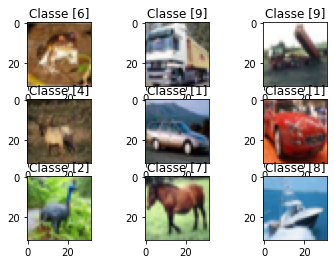

In [ ]:
from matplotlib import pyplot

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_trainVal[i])
    pyplot.title("Classe {}".format(y_trainVal[i]))

* 0: airplane
* 1: automobile
* 2: bird
* 3: cat
* 4: deer
* 5: dog
* 6: frog
* 7: horse
* 8: ship
* 9: truck




In [ ]:
import numpy as np

num_classes = len(np.unique(y_trainVal))
print("Número de classes: ", num_classes)

Número de classes:  10


# 1. Separe 20% dos dados de treinamento para validação.
Todos os treinamentos intermediários devem ser avaliados neste conjunto de validação.


In [ ]:
# Gera os índices para dividir os dados
nData = x_trainVal.shape[0]
nTrain = int(nData * 0.8)
np.random.seed(123)
randomIdx = np.random.permutation(np.arange(nData))
trainIdx = randomIdx[:nTrain]
valIdx = randomIdx[nTrain:]

# Divide os dados
x_val, y_val = x_trainVal[valIdx], y_trainVal[valIdx]
x_train, y_train = x_trainVal[trainIdx], y_trainVal[trainIdx]

# Transforma as imagens de tipo inteiro para tipo float
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

print("Formato das imagens de treinamento", x_train.shape)
print("Formato dos rótulos de treinamento", y_train.shape)
print()

print("Formato das imagens de validação", x_val.shape)
print("Formato dos rótulos de validação", y_val.shape)

Formato das imagens de treinamento (40000, 32, 32, 3)
Formato dos rótulos de treinamento (40000, 1)

Formato das imagens de validação (10000, 32, 32, 3)
Formato dos rótulos de validação (10000, 1)


# 2. (0,5) Construa uma rede neural convolucional para baseline.
Sugestão: comece por uma arquitetura simples. Quanto mais simples, melhor.

In [ ]:
import tensorflow as tf

y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
import matplotlib.pyplot as plt

def trainModel(model, n_epochs=10):
    sgd = tf.keras.optimizers.SGD(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'], )

    history = model.fit(x_train, y_train_cat,
              batch_size=128,
              epochs=n_epochs,
              verbose=1,
              validation_data=(x_val, y_val_cat))

    # Plot da accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # Plot da loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    print("Accuracy: ", history.history['accuracy'])
    print("Val Accuracy: ", history.history['val_accuracy'])
    print("Loss: ", history.history['loss'])
    print("Val Loss: ", history.history['val_loss'])

Epoch 1/10
313/313 [==============================] - 1s 4ms/step - loss: 19.9570 - accuracy: 0.1609 - val_loss: 2.2063 - val_accuracy: 0.1803
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 2.1463 - accuracy: 0.1908 - val_loss: 2.1506 - val_accuracy: 0.2000
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 2.0952 - accuracy: 0.2120 - val_loss: 2.0813 - val_accuracy: 0.2179
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 2.0811 - accuracy: 0.2195 - val_loss: 2.0921 - val_accuracy: 0.2041
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 2.0682 - accuracy: 0.2280 - val_loss: 2.0937 - val_accuracy: 0.1997
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 2.0593 - accuracy: 0.2356 - val_loss: 2.0720 - val_accuracy: 0.2262
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 2.0572 - accuracy: 0.2377 - val_loss: 2.0560 - val_accuracy: 0.2439
Epoch

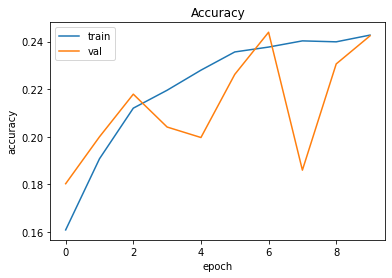

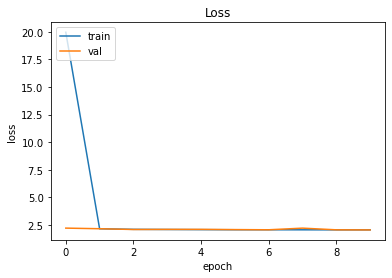

Accuracy:  [0.16089999675750732, 0.19077500700950623, 0.2120250016450882, 0.2195499986410141, 0.227974995970726, 0.2356249988079071, 0.2376749962568283, 0.24027499556541443, 0.23987500369548798, 0.24269999563694]
Val Accuracy:  [0.18029999732971191, 0.20000000298023224, 0.21789999306201935, 0.20409999787807465, 0.1996999979019165, 0.22619999945163727, 0.24390000104904175, 0.1860000044107437, 0.2305999994277954, 0.24240000545978546]
Loss:  [19.956981658935547, 2.14628267288208, 2.095229148864746, 2.081061363220215, 2.068223714828491, 2.0592737197875977, 2.057220458984375, 2.0527842044830322, 2.048940658569336, 2.0484743118286133]
Val Loss:  [2.2062666416168213, 2.1505908966064453, 2.0813162326812744, 2.092146396636963, 2.0936620235443115, 2.0719778537750244, 2.0560290813446045, 2.2044074535369873, 2.051468849182129, 2.043372392654419]


In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3
  ),
  layers.GlobalAveragePooling2D(),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model)

# 3. (0,5) Explore o impacto de três diferentes funções de ativação.

# **Relu**

Epoch 1/100
313/313 [==============================] - 1s 4ms/step - loss: 3.4489 - accuracy: 0.1033 - val_loss: 2.2980 - val_accuracy: 0.1066
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 2.2980 - accuracy: 0.1159 - val_loss: 2.2951 - val_accuracy: 0.1121
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 2.2954 - accuracy: 0.1168 - val_loss: 2.2931 - val_accuracy: 0.1151
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 2.2934 - accuracy: 0.1190 - val_loss: 2.2914 - val_accuracy: 0.1201
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 2.2915 - accuracy: 0.1214 - val_loss: 2.2895 - val_accuracy: 0.1205
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 2.2894 - accuracy: 0.1243 - val_loss: 2.2877 - val_accuracy: 0.1223
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 2.2873 - accuracy: 0.1257 - val_loss: 2.2859 - val_accuracy: 0.1210

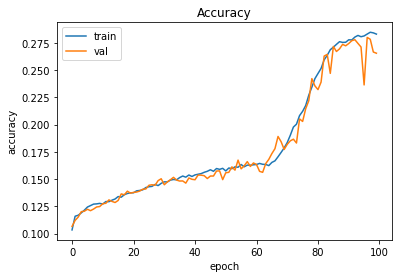

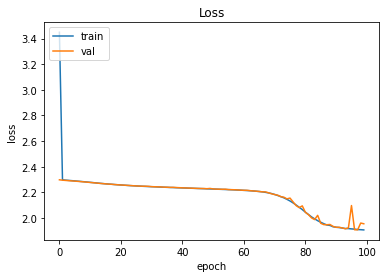

Accuracy:  [0.10334999859333038, 0.11592499911785126, 0.11680000275373459, 0.11897499859333038, 0.12144999951124191, 0.12432499974966049, 0.1256749927997589, 0.12702499330043793, 0.12725000083446503, 0.12770000100135803, 0.12707500159740448, 0.12939999997615814, 0.12927499413490295, 0.13064999878406525, 0.1317249983549118, 0.13394999504089355, 0.13337500393390656, 0.13562500476837158, 0.13677500188350677, 0.13734999299049377, 0.1374250054359436, 0.13922500610351562, 0.13955000042915344, 0.14012500643730164, 0.1422249972820282, 0.14297500252723694, 0.14329999685287476, 0.14509999752044678, 0.14402499794960022, 0.1460999995470047, 0.14745000004768372, 0.14742499589920044, 0.14904999732971191, 0.1496250033378601, 0.14932499825954437, 0.15137499570846558, 0.15279999375343323, 0.15174999833106995, 0.1537500023841858, 0.15240000188350677, 0.15382499992847443, 0.1544249951839447, 0.15502500534057617, 0.15622499585151672, 0.157150000333786, 0.15854999423027039, 0.157150000333786, 0.15970000624

In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    activation='relu'
  ),
  layers.GlobalAveragePooling2D(),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model, 100)

Epoch 1/100
313/313 [==============================] - 1s 4ms/step - loss: 1.9056 - accuracy: 0.2851 - val_loss: 1.9402 - val_accuracy: 0.2794
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 1.9072 - accuracy: 0.2862 - val_loss: 1.9203 - val_accuracy: 0.2702
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 1.9053 - accuracy: 0.2837 - val_loss: 1.9185 - val_accuracy: 0.2801
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 1.9023 - accuracy: 0.2859 - val_loss: 1.9838 - val_accuracy: 0.2605
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 1.9029 - accuracy: 0.2847 - val_loss: 1.9896 - val_accuracy: 0.2548
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8994 - accuracy: 0.2877 - val_loss: 1.9271 - val_accuracy: 0.2767
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8983 - accuracy: 0.2872 - val_loss: 1.9050 - val_accuracy: 0.2777

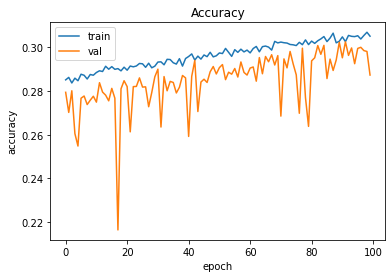

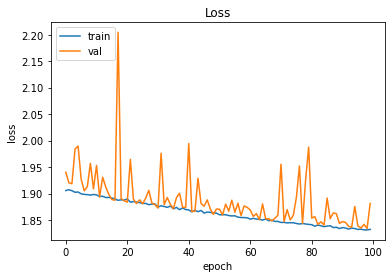

Accuracy:  [0.2851000130176544, 0.28622499108314514, 0.2836749851703644, 0.28587499260902405, 0.2847000062465668, 0.28767499327659607, 0.287200003862381, 0.2854999899864197, 0.2875500023365021, 0.28722500801086426, 0.28847500681877136, 0.289249986410141, 0.2889249920845032, 0.29132500290870667, 0.28997498750686646, 0.2911500036716461, 0.2899250090122223, 0.2902500033378601, 0.2892250120639801, 0.29089999198913574, 0.28952500224113464, 0.2914249897003174, 0.2910749912261963, 0.29144999384880066, 0.29260000586509705, 0.2924500107765198, 0.2908500134944916, 0.29272499680519104, 0.2906250059604645, 0.2913750112056732, 0.2932499945163727, 0.2933500111103058, 0.2919999957084656, 0.2944999933242798, 0.29440000653266907, 0.29292500019073486, 0.2923249900341034, 0.2948000133037567, 0.2913999855518341, 0.29487499594688416, 0.29580000042915344, 0.2969749867916107, 0.2941499948501587, 0.295974999666214, 0.2946000099182129, 0.29649999737739563, 0.2957249879837036, 0.29772499203681946, 0.29562500119

In [ ]:
trainModel(model, 100)

Epoch 1/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8314 - accuracy: 0.3061 - val_loss: 1.8578 - val_accuracy: 0.2966
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8312 - accuracy: 0.3049 - val_loss: 1.8333 - val_accuracy: 0.3003
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8303 - accuracy: 0.3071 - val_loss: 1.8329 - val_accuracy: 0.3000
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8314 - accuracy: 0.3052 - val_loss: 1.8560 - val_accuracy: 0.2972
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8291 - accuracy: 0.3056 - val_loss: 1.8469 - val_accuracy: 0.2945
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8296 - accuracy: 0.3028 - val_loss: 1.8328 - val_accuracy: 0.3032
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 1.8289 - accuracy: 0.3054 - val_loss: 1.8426 - val_accuracy: 0.2990

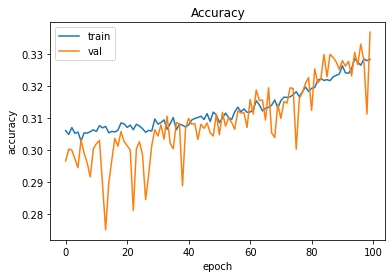

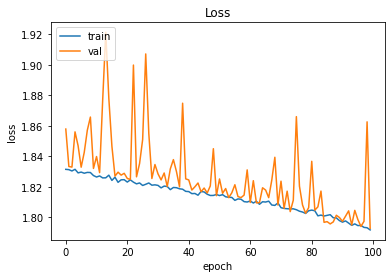

Accuracy:  [0.3061000108718872, 0.30489999055862427, 0.30707499384880066, 0.30524998903274536, 0.305649995803833, 0.302825003862381, 0.305400013923645, 0.3053250014781952, 0.3057500123977661, 0.3063249886035919, 0.3058750033378601, 0.30764999985694885, 0.30695000290870667, 0.30742499232292175, 0.3054249882698059, 0.30584999918937683, 0.3056749999523163, 0.3062250018119812, 0.3084999918937683, 0.30820000171661377, 0.30709999799728394, 0.3078249990940094, 0.30637499690055847, 0.3080750107765198, 0.30752500891685486, 0.3066999912261963, 0.30557501316070557, 0.30617499351501465, 0.30594998598098755, 0.30972498655319214, 0.30812498927116394, 0.3086250126361847, 0.3094500005245209, 0.30649998784065247, 0.3082750141620636, 0.31017500162124634, 0.3063499927520752, 0.30809998512268066, 0.3077999949455261, 0.30720001459121704, 0.30790001153945923, 0.3093999922275543, 0.30992498993873596, 0.3102000057697296, 0.31060001254081726, 0.30957499146461487, 0.31139999628067017, 0.3089500069618225, 0.3118

In [ ]:
trainModel(model, 100)

Epoch 1/100
313/313 [==============================] - 1s 5ms/step - loss: 1.7915 - accuracy: 0.3310 - val_loss: 1.8345 - val_accuracy: 0.3130
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7920 - accuracy: 0.3289 - val_loss: 1.7870 - val_accuracy: 0.3347
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7898 - accuracy: 0.3319 - val_loss: 1.7865 - val_accuracy: 0.3294
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7901 - accuracy: 0.3309 - val_loss: 1.7872 - val_accuracy: 0.3311
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7883 - accuracy: 0.3327 - val_loss: 1.8135 - val_accuracy: 0.3303
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7911 - accuracy: 0.3314 - val_loss: 1.7829 - val_accuracy: 0.3337
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7885 - accuracy: 0.3343 - val_loss: 1.7874 - val_accuracy: 0.3340

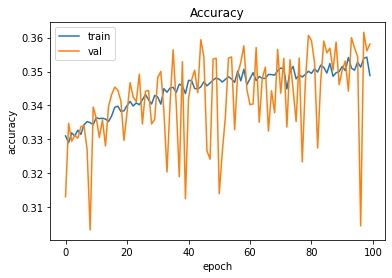

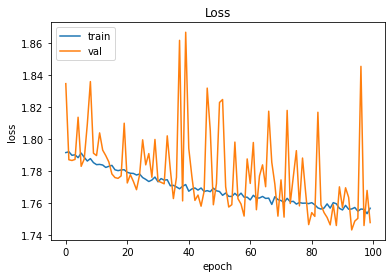

Accuracy:  [0.3309749960899353, 0.3289499878883362, 0.3318749964237213, 0.33092498779296875, 0.3326750099658966, 0.3314250111579895, 0.3342750072479248, 0.3352000117301941, 0.33489999175071716, 0.3343000113964081, 0.33637499809265137, 0.3360750079154968, 0.3361999988555908, 0.33594998717308044, 0.335224986076355, 0.336899995803833, 0.3394249975681305, 0.3397499918937683, 0.33822500705718994, 0.3384000062942505, 0.33994999527931213, 0.3411499857902527, 0.33980000019073486, 0.34072500467300415, 0.34017500281333923, 0.34165000915527344, 0.3431999981403351, 0.3416750133037567, 0.34040001034736633, 0.3429499864578247, 0.34242498874664307, 0.3403500020503998, 0.34494999051094055, 0.343874990940094, 0.3451249897480011, 0.3453249931335449, 0.34380000829696655, 0.34630000591278076, 0.34575000405311584, 0.34347501397132874, 0.3473750054836273, 0.3472999930381775, 0.34497499465942383, 0.34482499957084656, 0.3454500138759613, 0.3469749987125397, 0.3457750082015991, 0.3465999960899353, 0.3474499881

In [ ]:
trainModel(model, 100)

Epoch 1/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7568 - accuracy: 0.3531 - val_loss: 1.7451 - val_accuracy: 0.3594
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7548 - accuracy: 0.3530 - val_loss: 1.7472 - val_accuracy: 0.3603
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7533 - accuracy: 0.3540 - val_loss: 1.7529 - val_accuracy: 0.3492
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7524 - accuracy: 0.3524 - val_loss: 1.8033 - val_accuracy: 0.3406
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7550 - accuracy: 0.3519 - val_loss: 1.7405 - val_accuracy: 0.3603
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7545 - accuracy: 0.3525 - val_loss: 1.7499 - val_accuracy: 0.3558
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 1.7515 - accuracy: 0.3552 - val_loss: 1.7832 - val_accuracy: 0.3354

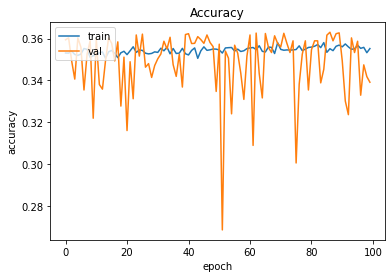

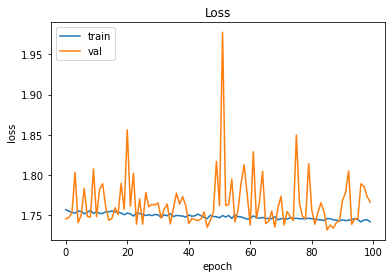

Accuracy:  [0.3530749976634979, 0.35302498936653137, 0.35397499799728394, 0.35237500071525574, 0.3519499897956848, 0.3525499999523163, 0.35522499680519104, 0.3548249900341034, 0.35100001096725464, 0.35179999470710754, 0.3518249988555908, 0.35317501425743103, 0.35359999537467957, 0.35054999589920044, 0.35362499952316284, 0.35429999232292175, 0.3528999984264374, 0.350849986076355, 0.35317501425743103, 0.3538999855518341, 0.3522999882698059, 0.3541249930858612, 0.3560500144958496, 0.35337498784065247, 0.3544999957084656, 0.35432499647140503, 0.3529750108718872, 0.352649986743927, 0.3528749942779541, 0.35362499952316284, 0.35337498784065247, 0.35534998774528503, 0.3541249930858612, 0.3558749854564667, 0.35269999504089355, 0.35522499680519104, 0.3528499901294708, 0.35302498936653137, 0.35530000925064087, 0.35272499918937683, 0.35214999318122864, 0.35429999232292175, 0.3555000126361847, 0.35052499175071716, 0.35409998893737793, 0.35602501034736633, 0.3543500006198883, 0.3546000123023987, 0.3

In [ ]:
trainModel(model, 100)

In [ ]:
simpleRelu500TrainedModel = model

# Softmax

Epoch 1/10
313/313 [==============================] - 2s 5ms/step - loss: 2.3147 - accuracy: 0.1448 - val_loss: 2.2944 - val_accuracy: 0.1658
Epoch 2/10
313/313 [==============================] - 1s 5ms/step - loss: 2.2801 - accuracy: 0.1683 - val_loss: 2.2746 - val_accuracy: 0.1687
Epoch 3/10
313/313 [==============================] - 1s 5ms/step - loss: 2.2736 - accuracy: 0.1683 - val_loss: 2.2710 - val_accuracy: 0.1689
Epoch 4/10
313/313 [==============================] - 1s 5ms/step - loss: 2.2706 - accuracy: 0.1701 - val_loss: 2.2689 - val_accuracy: 0.1689
Epoch 5/10
313/313 [==============================] - 1s 5ms/step - loss: 2.2682 - accuracy: 0.1730 - val_loss: 2.2663 - val_accuracy: 0.1762
Epoch 6/10
313/313 [==============================] - 1s 5ms/step - loss: 2.2658 - accuracy: 0.1760 - val_loss: 2.2664 - val_accuracy: 0.1831
Epoch 7/10
313/313 [==============================] - 1s 5ms/step - loss: 2.2637 - accuracy: 0.1773 - val_loss: 2.2628 - val_accuracy: 0.1848
Epoch 

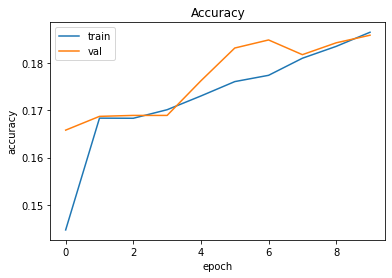

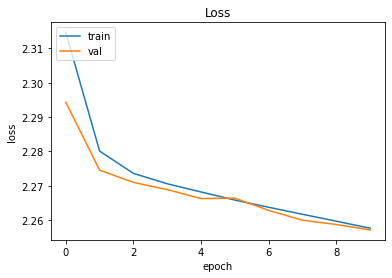

Accuracy:  [0.14477500319480896, 0.1683250069618225, 0.16830000281333923, 0.17010000348091125, 0.17299999296665192, 0.17602500319480896, 0.1773499995470047, 0.18095000088214874, 0.18344999849796295, 0.18642500042915344]
Val Accuracy:  [0.16580000519752502, 0.16869999468326569, 0.1688999980688095, 0.1688999980688095, 0.1762000024318695, 0.18310000002384186, 0.18479999899864197, 0.18170000612735748, 0.1842000037431717, 0.1858000010251999]
Loss:  [2.314724922180176, 2.2801129817962646, 2.273610830307007, 2.270585060119629, 2.2681996822357178, 2.2658329010009766, 2.2637462615966797, 2.261702060699463, 2.25968074798584, 2.257641077041626]
Val Loss:  [2.2943646907806396, 2.2745587825775146, 2.2710041999816895, 2.268893241882324, 2.266268014907837, 2.26641583442688, 2.2628300189971924, 2.2599833011627197, 2.2587218284606934, 2.257145881652832]


In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    activation='softmax'
  ),
  layers.GlobalAveragePooling2D(),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model)

# Softsign

Epoch 1/10
313/313 [==============================] - 1s 4ms/step - loss: 2.4591 - accuracy: 0.1112 - val_loss: 2.3287 - val_accuracy: 0.1386
Epoch 2/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3164 - accuracy: 0.1468 - val_loss: 2.3089 - val_accuracy: 0.1542
Epoch 3/10
313/313 [==============================] - 1s 4ms/step - loss: 2.2994 - accuracy: 0.1660 - val_loss: 2.2915 - val_accuracy: 0.1666
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 2.2878 - accuracy: 0.1831 - val_loss: 2.2822 - val_accuracy: 0.1831
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 2.2791 - accuracy: 0.1908 - val_loss: 2.2783 - val_accuracy: 0.1784
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 2.2724 - accuracy: 0.1960 - val_loss: 2.2682 - val_accuracy: 0.1938
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 2.2667 - accuracy: 0.1993 - val_loss: 2.2631 - val_accuracy: 0.1931
Epoch 

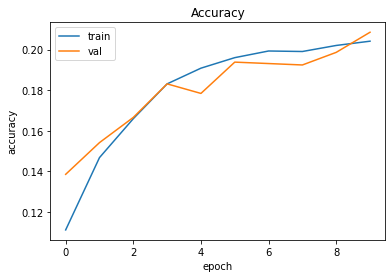

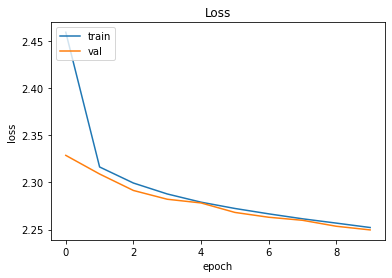

Accuracy:  [0.11124999821186066, 0.14682500064373016, 0.16597500443458557, 0.18310000002384186, 0.19082500040531158, 0.19599999487400055, 0.19927500188350677, 0.1990250051021576, 0.20200000703334808, 0.20409999787807465]
Val Accuracy:  [0.13860000669956207, 0.1542000025510788, 0.16660000383853912, 0.18310000002384186, 0.17839999496936798, 0.19380000233650208, 0.1931000053882599, 0.1923999935388565, 0.19859999418258667, 0.2084999978542328]
Loss:  [2.4591264724731445, 2.316391706466675, 2.299370050430298, 2.2878036499023438, 2.2790958881378174, 2.272439956665039, 2.266741991043091, 2.2614917755126953, 2.2569186687469482, 2.2522497177124023]
Val Loss:  [2.328695774078369, 2.3089377880096436, 2.2914958000183105, 2.2822060585021973, 2.27828311920166, 2.268247365951538, 2.2631330490112305, 2.259908437728882, 2.253577947616577, 2.2497141361236572]


In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    activation='softsign'
  ),
  layers.GlobalAveragePooling2D(),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model)

# 4. (1,5) Explore o impacto de variar a quantidade de camadas de convolução e pooling.
Cuidado com overfitting! Explore, no mínimo, duas arquiteturas diferentes do baseline.

# Arquitetura 1

Epoch 1/10
313/313 [==============================] - 4s 11ms/step - loss: 3.0876 - accuracy: 0.2228 - val_loss: 2.0335 - val_accuracy: 0.2486
Epoch 2/10
313/313 [==============================] - 3s 11ms/step - loss: 1.9568 - accuracy: 0.2808 - val_loss: 1.9763 - val_accuracy: 0.2638
Epoch 3/10
313/313 [==============================] - 3s 11ms/step - loss: 1.8993 - accuracy: 0.3034 - val_loss: 1.9385 - val_accuracy: 0.2944
Epoch 4/10
313/313 [==============================] - 3s 11ms/step - loss: 1.8624 - accuracy: 0.3170 - val_loss: 1.8858 - val_accuracy: 0.3106
Epoch 5/10
313/313 [==============================] - 3s 11ms/step - loss: 1.8284 - accuracy: 0.3315 - val_loss: 1.8421 - val_accuracy: 0.3131
Epoch 6/10
313/313 [==============================] - 3s 11ms/step - loss: 1.7987 - accuracy: 0.3444 - val_loss: 1.8014 - val_accuracy: 0.3370
Epoch 7/10
313/313 [==============================] - 3s 11ms/step - loss: 1.7725 - accuracy: 0.3528 - val_loss: 1.9008 - val_accuracy: 0.3166

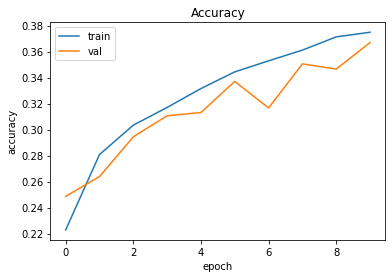

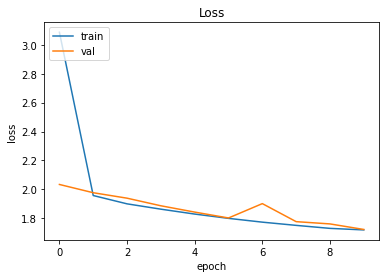

Accuracy:  [0.22280000150203705, 0.28075000643730164, 0.3033750057220459, 0.31700000166893005, 0.33149999380111694, 0.34435001015663147, 0.35282498598098755, 0.3610750138759613, 0.3712500035762787, 0.37482500076293945]
Val Accuracy:  [0.24860000610351562, 0.2637999951839447, 0.29440000653266907, 0.31060001254081726, 0.31310001015663147, 0.3370000123977661, 0.3165999948978424, 0.3504999876022339, 0.3465000092983246, 0.3668999969959259]
Loss:  [3.087637424468994, 1.9568361043930054, 1.8992571830749512, 1.862389087677002, 1.828444004058838, 1.7987247705459595, 1.7724536657333374, 1.7501697540283203, 1.7293838262557983, 1.7186976671218872]
Val Loss:  [2.033468008041382, 1.9762721061706543, 1.938475251197815, 1.8858256340026855, 1.8421310186386108, 1.8013771772384644, 1.9008078575134277, 1.7759480476379395, 1.7602455615997314, 1.721839427947998]


In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
  ),
  layers.Dense(256, activation='relu'),
  layers.GlobalAveragePooling2D(),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model)

# Arquitetura 2

Epoch 1/10
313/313 [==============================] - 4s 12ms/step - loss: 2.4060 - accuracy: 0.2220 - val_loss: 1.9944 - val_accuracy: 0.2565
Epoch 2/10
313/313 [==============================] - 4s 11ms/step - loss: 1.9407 - accuracy: 0.2779 - val_loss: 2.0272 - val_accuracy: 0.2441
Epoch 3/10
313/313 [==============================] - 4s 11ms/step - loss: 1.8893 - accuracy: 0.2997 - val_loss: 1.8860 - val_accuracy: 0.2851
Epoch 4/10
313/313 [==============================] - 3s 11ms/step - loss: 1.8464 - accuracy: 0.3179 - val_loss: 1.8616 - val_accuracy: 0.3163
Epoch 5/10
313/313 [==============================] - 3s 11ms/step - loss: 1.8116 - accuracy: 0.3270 - val_loss: 1.7928 - val_accuracy: 0.3269
Epoch 6/10
313/313 [==============================] - 3s 11ms/step - loss: 1.7780 - accuracy: 0.3416 - val_loss: 1.8280 - val_accuracy: 0.3091
Epoch 7/10
313/313 [==============================] - 3s 11ms/step - loss: 1.7554 - accuracy: 0.3501 - val_loss: 1.7713 - val_accuracy: 0.3356

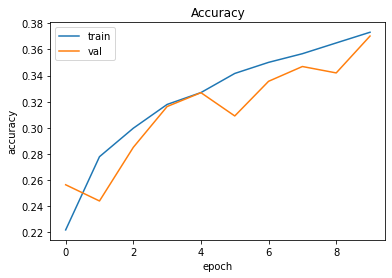

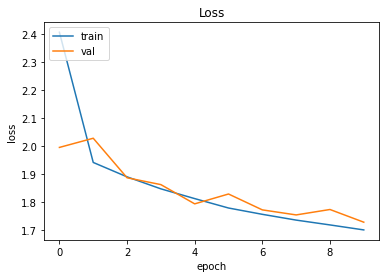

Accuracy:  [0.22197499871253967, 0.2779499888420105, 0.2997249960899353, 0.31790000200271606, 0.3269749879837036, 0.3416000008583069, 0.35007500648498535, 0.35670000314712524, 0.36492499709129333, 0.37310001254081726]
Val Accuracy:  [0.2565000057220459, 0.24410000443458557, 0.2851000130176544, 0.31630000472068787, 0.32690000534057617, 0.3091000020503998, 0.33559998869895935, 0.34689998626708984, 0.34200000762939453, 0.3702000081539154]
Loss:  [2.4059700965881348, 1.9407328367233276, 1.8893029689788818, 1.8464410305023193, 1.8115754127502441, 1.7779675722122192, 1.7554152011871338, 1.7347604036331177, 1.7175177335739136, 1.6996896266937256]
Val Loss:  [1.9944379329681396, 2.027247190475464, 1.8860087394714355, 1.8615590333938599, 1.7927939891815186, 1.8280069828033447, 1.7712907791137695, 1.7532689571380615, 1.7726631164550781, 1.7272762060165405]


In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3
  ),
  layers.Dense(256, activation='relu'),
  layers.GlobalAveragePooling2D(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model)

# Arquitetura 3

Epoch 1/10
313/313 [==============================] - 5s 16ms/step - loss: 10.0602 - accuracy: 0.2153 - val_loss: 1.9952 - val_accuracy: 0.3029
Epoch 2/10
313/313 [==============================] - 5s 15ms/step - loss: 1.9607 - accuracy: 0.3140 - val_loss: 2.2644 - val_accuracy: 0.2497
Epoch 3/10
313/313 [==============================] - 5s 14ms/step - loss: 1.9010 - accuracy: 0.3322 - val_loss: 1.8745 - val_accuracy: 0.3483
Epoch 4/10
313/313 [==============================] - 5s 15ms/step - loss: 1.8705 - accuracy: 0.3501 - val_loss: 1.8668 - val_accuracy: 0.3645
Epoch 5/10
313/313 [==============================] - 5s 15ms/step - loss: 1.8520 - accuracy: 0.3523 - val_loss: 1.8692 - val_accuracy: 0.3524
Epoch 6/10
313/313 [==============================] - 5s 15ms/step - loss: 1.8312 - accuracy: 0.3611 - val_loss: 2.0064 - val_accuracy: 0.2919
Epoch 7/10
313/313 [==============================] - 5s 15ms/step - loss: 1.8236 - accuracy: 0.3665 - val_loss: 1.8519 - val_accuracy: 0.365

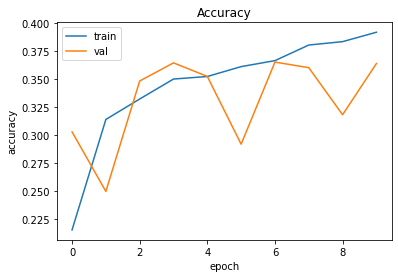

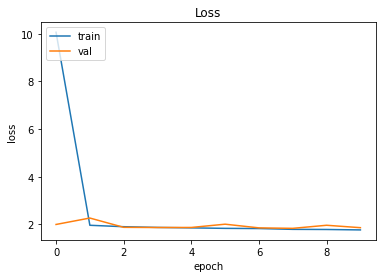

Accuracy:  [0.2153249979019165, 0.3139750063419342, 0.3322249948978424, 0.3500500023365021, 0.3523249924182892, 0.36114999651908875, 0.36649999022483826, 0.38042500615119934, 0.3834500014781952, 0.39184999465942383]
Val Accuracy:  [0.3028999865055084, 0.24969999492168427, 0.3483000099658966, 0.3644999861717224, 0.352400004863739, 0.29190000891685486, 0.365200012922287, 0.3601999878883362, 0.3181999921798706, 0.36390000581741333]
Loss:  [10.060247421264648, 1.960747241973877, 1.9009807109832764, 1.8704599142074585, 1.8520265817642212, 1.8311963081359863, 1.8235853910446167, 1.789891242980957, 1.7844150066375732, 1.766137719154358]
Val Loss:  [1.9951857328414917, 2.264430284500122, 1.874539852142334, 1.8667762279510498, 1.8692213296890259, 2.0063514709472656, 1.8518911600112915, 1.8321055173873901, 1.961429238319397, 1.8599300384521484]


In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    padding='valid', activation='relu', input_shape=(32, 32, 3)
  ),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dense(32*32),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model)

# Arquitetura 4

Epoch 1/10
313/313 [==============================] - 6s 19ms/step - loss: 10.2043 - accuracy: 0.1664 - val_loss: 2.1736 - val_accuracy: 0.2054
Epoch 2/10
313/313 [==============================] - 6s 19ms/step - loss: 2.1237 - accuracy: 0.2325 - val_loss: 2.0390 - val_accuracy: 0.2740
Epoch 3/10
313/313 [==============================] - 6s 19ms/step - loss: 1.9794 - accuracy: 0.2948 - val_loss: 1.9469 - val_accuracy: 0.3088
Epoch 4/10
313/313 [==============================] - 6s 19ms/step - loss: 1.9105 - accuracy: 0.3207 - val_loss: 1.9354 - val_accuracy: 0.3151
Epoch 5/10
313/313 [==============================] - 6s 19ms/step - loss: 1.8637 - accuracy: 0.3338 - val_loss: 1.8368 - val_accuracy: 0.3437
Epoch 6/10
313/313 [==============================] - 6s 19ms/step - loss: 1.8161 - accuracy: 0.3552 - val_loss: 1.8190 - val_accuracy: 0.3527
Epoch 7/10
313/313 [==============================] - 6s 19ms/step - loss: 1.7748 - accuracy: 0.3726 - val_loss: 1.8034 - val_accuracy: 0.365

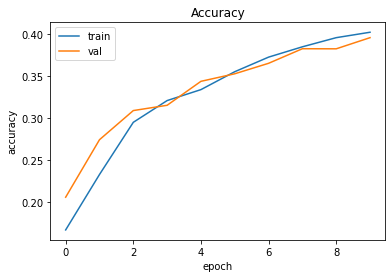

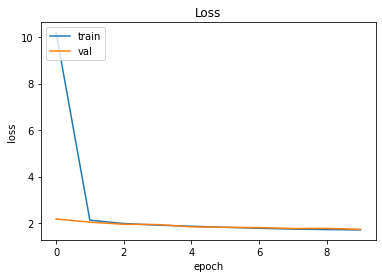

Accuracy:  [0.16635000705718994, 0.23247499763965607, 0.29477500915527344, 0.3207249939441681, 0.33379998803138733, 0.3551749885082245, 0.3725750148296356, 0.3849000036716461, 0.39579999446868896, 0.4022749960422516]
Val Accuracy:  [0.2054000049829483, 0.27399998903274536, 0.30880001187324524, 0.3151000142097473, 0.34369999170303345, 0.35269999504089355, 0.365200012922287, 0.38260000944137573, 0.3824999928474426, 0.39579999446868896]
Loss:  [10.20429515838623, 2.1236610412597656, 1.9793671369552612, 1.910521149635315, 1.8636749982833862, 1.8161189556121826, 1.774756669998169, 1.7396435737609863, 1.7196861505508423, 1.7045167684555054]
Val Loss:  [2.173593044281006, 2.0389633178710938, 1.9468859434127808, 1.9353562593460083, 1.836846113204956, 1.819014072418213, 1.8034049272537231, 1.7659318447113037, 1.7689878940582275, 1.7301242351531982]


In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    padding='valid', activation='relu', input_shape=(32, 32, 3)
  ),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dense(32*32),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model)

# Arquitetura 5

Epoch 1/10
313/313 [==============================] - 15s 46ms/step - loss: 13.0019 - accuracy: 0.2208 - val_loss: 2.0334 - val_accuracy: 0.2807
Epoch 2/10
313/313 [==============================] - 14s 46ms/step - loss: 1.9718 - accuracy: 0.3052 - val_loss: 1.9464 - val_accuracy: 0.3186
Epoch 3/10
313/313 [==============================] - 14s 46ms/step - loss: 1.9038 - accuracy: 0.3287 - val_loss: 1.9274 - val_accuracy: 0.3384
Epoch 4/10
313/313 [==============================] - 14s 46ms/step - loss: 1.8819 - accuracy: 0.3352 - val_loss: 1.8756 - val_accuracy: 0.3513
Epoch 5/10
313/313 [==============================] - 14s 46ms/step - loss: 1.8612 - accuracy: 0.3469 - val_loss: 1.8301 - val_accuracy: 0.3590
Epoch 6/10
313/313 [==============================] - 14s 46ms/step - loss: 1.8411 - accuracy: 0.3516 - val_loss: 2.1117 - val_accuracy: 0.2743
Epoch 7/10
313/313 [==============================] - 14s 46ms/step - loss: 1.8416 - accuracy: 0.3519 - val_loss: 1.9311 - val_accuracy

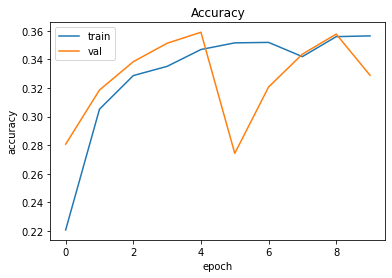

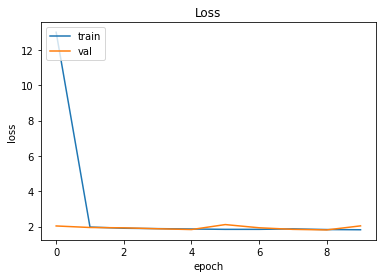

Accuracy:  [0.22077499330043793, 0.3052000105381012, 0.3287000060081482, 0.33515000343322754, 0.3469249904155731, 0.35157498717308044, 0.35190001130104065, 0.341949999332428, 0.3559249937534332, 0.35644999146461487]
Val Accuracy:  [0.2806999981403351, 0.31859999895095825, 0.3384000062942505, 0.3513000011444092, 0.35899999737739563, 0.2743000090122223, 0.3206999897956848, 0.34369999170303345, 0.357699990272522, 0.328900009393692]
Loss:  [13.001890182495117, 1.9718226194381714, 1.9038150310516357, 1.8819289207458496, 1.861194372177124, 1.8411158323287964, 1.8416072130203247, 1.8680720329284668, 1.8303699493408203, 1.8187888860702515]
Val Loss:  [2.0334391593933105, 1.9463961124420166, 1.9273951053619385, 1.8756284713745117, 1.8301138877868652, 2.1117351055145264, 1.931124210357666, 1.8409947156906128, 1.8093910217285156, 2.038792848587036]


In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    padding='valid', activation='relu', input_shape=(32, 32, 3)
  ),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dense(32*32*3),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model)

# 5. (1,5) Para cada camada, explore o uso de duas diferentes inicializações e regularizações.

Epoch 1/10
313/313 [==============================] - 4s 11ms/step - loss: 2.3007 - accuracy: 0.0979 - val_loss: 2.2944 - val_accuracy: 0.1005
Epoch 2/10
313/313 [==============================] - 4s 11ms/step - loss: 2.2894 - accuracy: 0.1003 - val_loss: 2.2837 - val_accuracy: 0.1034
Epoch 3/10
313/313 [==============================] - 3s 11ms/step - loss: 2.2730 - accuracy: 0.1195 - val_loss: 2.2596 - val_accuracy: 0.1340
Epoch 4/10
313/313 [==============================] - 4s 11ms/step - loss: 2.2372 - accuracy: 0.1548 - val_loss: 2.2103 - val_accuracy: 0.1689
Epoch 5/10
313/313 [==============================] - 4s 11ms/step - loss: 2.1782 - accuracy: 0.1814 - val_loss: 2.1484 - val_accuracy: 0.1728
Epoch 6/10
313/313 [==============================] - 3s 11ms/step - loss: 2.1307 - accuracy: 0.1867 - val_loss: 2.1185 - val_accuracy: 0.1841
Epoch 7/10
313/313 [==============================] - 4s 11ms/step - loss: 2.1110 - accuracy: 0.1974 - val_loss: 2.1046 - val_accuracy: 0.2096

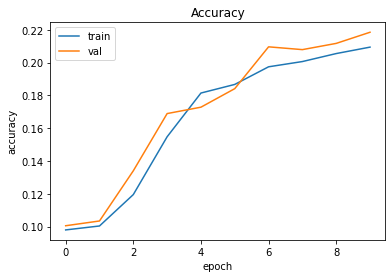

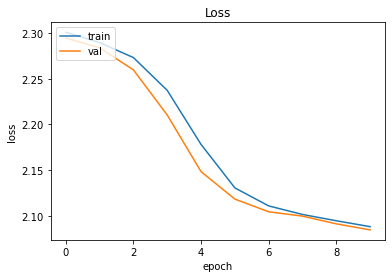

Accuracy:  [0.09794999659061432, 0.10034999996423721, 0.11949999630451202, 0.1547500044107437, 0.18142500519752502, 0.18667499721050262, 0.1974249929189682, 0.2006250023841858, 0.20550000667572021, 0.20942500233650208]
Val Accuracy:  [0.10050000250339508, 0.10339999943971634, 0.1340000033378601, 0.1688999980688095, 0.1728000044822693, 0.18410000205039978, 0.20960000157356262, 0.2079000025987625, 0.21170000731945038, 0.21850000321865082]
Loss:  [2.300724506378174, 2.2894086837768555, 2.2730491161346436, 2.237233877182007, 2.178173303604126, 2.1307122707366943, 2.1110317707061768, 2.1017003059387207, 2.0948147773742676, 2.088379383087158]
Val Loss:  [2.294430732727051, 2.2836732864379883, 2.25964617729187, 2.2102859020233154, 2.1484415531158447, 2.118492603302002, 2.1046319007873535, 2.099886417388916, 2.0914409160614014, 2.084825277328491]


In [ ]:
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    kernel_initializer=initializer,
  ),
  layers.Dense(256, activation='relu', kernel_initializer=initializer),
  layers.GlobalAveragePooling2D(),
  layers.Dense(128, activation='relu', kernel_initializer=initializer),
  layers.Dense(num_classes, activation='softmax', kernel_initializer=initializer)
])

trainModel(model)

Epoch 1/10
313/313 [==============================] - 4s 12ms/step - loss: 2.5066 - accuracy: 0.2309 - val_loss: 2.0464 - val_accuracy: 0.2275
Epoch 2/10
313/313 [==============================] - 4s 11ms/step - loss: 1.9359 - accuracy: 0.2862 - val_loss: 1.9160 - val_accuracy: 0.2754
Epoch 3/10
313/313 [==============================] - 3s 11ms/step - loss: 1.8784 - accuracy: 0.3086 - val_loss: 1.8652 - val_accuracy: 0.3052
Epoch 4/10
313/313 [==============================] - 3s 11ms/step - loss: 1.8339 - accuracy: 0.3259 - val_loss: 1.8307 - val_accuracy: 0.3306
Epoch 5/10
313/313 [==============================] - 3s 11ms/step - loss: 1.7956 - accuracy: 0.3403 - val_loss: 1.8107 - val_accuracy: 0.3353
Epoch 6/10
313/313 [==============================] - 3s 11ms/step - loss: 1.7694 - accuracy: 0.3517 - val_loss: 1.8092 - val_accuracy: 0.3118
Epoch 7/10
313/313 [==============================] - 3s 11ms/step - loss: 1.7445 - accuracy: 0.3620 - val_loss: 1.7957 - val_accuracy: 0.3354

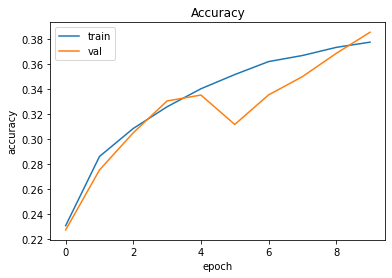

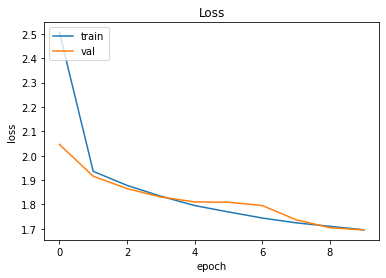

Accuracy:  [0.23090000450611115, 0.28619998693466187, 0.3086000084877014, 0.3259499967098236, 0.3403249979019165, 0.35167500376701355, 0.36204999685287476, 0.3668999969959259, 0.3734000027179718, 0.37757501006126404]
Val Accuracy:  [0.22750000655651093, 0.2754000127315521, 0.3052000105381012, 0.33059999346733093, 0.3352999985218048, 0.3118000030517578, 0.3353999853134155, 0.3499999940395355, 0.3686000108718872, 0.3855000138282776]
Loss:  [2.506558418273926, 1.9359081983566284, 1.8784140348434448, 1.8339393138885498, 1.7956148386001587, 1.7693641185760498, 1.7444859743118286, 1.7247470617294312, 1.7104343175888062, 1.6960902214050293]
Val Loss:  [2.04638934135437, 1.9159660339355469, 1.865159511566162, 1.830741047859192, 1.8106989860534668, 1.8091601133346558, 1.7957158088684082, 1.7372478246688843, 1.7048450708389282, 1.6957281827926636]


In [ ]:
initializer = initializers.GlorotNormal()

model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    kernel_initializer=initializer,
  ),
  layers.Dense(256, activation='relu', kernel_initializer=initializer),
  layers.GlobalAveragePooling2D(),
  layers.Dense(128, activation='relu', kernel_initializer=initializer),
  layers.Dense(num_classes, activation='softmax', kernel_initializer=initializer)
])

trainModel(model)

Epoch 1/10
313/313 [==============================] - 4s 11ms/step - loss: 2.7655 - accuracy: 0.2378 - val_loss: 1.9560 - val_accuracy: 0.2755
Epoch 2/10
313/313 [==============================] - 3s 11ms/step - loss: 1.9189 - accuracy: 0.2949 - val_loss: 1.9491 - val_accuracy: 0.2591
Epoch 3/10
313/313 [==============================] - 3s 11ms/step - loss: 1.8617 - accuracy: 0.3155 - val_loss: 1.8397 - val_accuracy: 0.3144
Epoch 4/10
313/313 [==============================] - 4s 11ms/step - loss: 1.8191 - accuracy: 0.3293 - val_loss: 1.8317 - val_accuracy: 0.3192
Epoch 5/10
313/313 [==============================] - 4s 11ms/step - loss: 1.7832 - accuracy: 0.3416 - val_loss: 1.7806 - val_accuracy: 0.3436
Epoch 6/10
313/313 [==============================] - 4s 11ms/step - loss: 1.7544 - accuracy: 0.3506 - val_loss: 1.7659 - val_accuracy: 0.3418
Epoch 7/10
313/313 [==============================] - 4s 11ms/step - loss: 1.7360 - accuracy: 0.3574 - val_loss: 1.7464 - val_accuracy: 0.3487

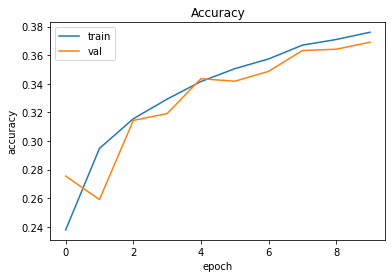

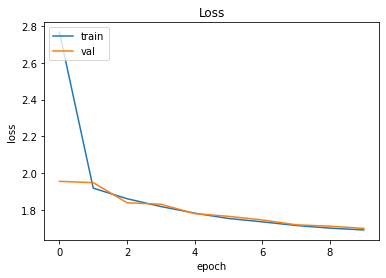

Accuracy:  [0.23782500624656677, 0.29487499594688416, 0.3155499994754791, 0.3292999863624573, 0.3416000008583069, 0.3505750000476837, 0.35740000009536743, 0.3670499920845032, 0.3709999918937683, 0.37607499957084656]
Val Accuracy:  [0.27549999952316284, 0.2590999901294708, 0.31439998745918274, 0.3192000091075897, 0.34360000491142273, 0.3418000042438507, 0.34869998693466187, 0.36329999566078186, 0.36419999599456787, 0.36910000443458557]
Loss:  [2.765526056289673, 1.9188731908798218, 1.861691951751709, 1.819139838218689, 1.7832000255584717, 1.7543818950653076, 1.7360013723373413, 1.7162562608718872, 1.7018057107925415, 1.6922167539596558]
Val Loss:  [1.9559500217437744, 1.94906485080719, 1.839677333831787, 1.8317171335220337, 1.7805839776992798, 1.7659398317337036, 1.7464498281478882, 1.7199980020523071, 1.7122976779937744, 1.7006820440292358]


In [ ]:
initializer = initializers.GlorotUniform()

model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    kernel_initializer=initializer,
  ),
  layers.Dense(256, activation='relu', kernel_initializer=initializer),
  layers.GlobalAveragePooling2D(),
  layers.Dense(128, activation='relu', kernel_initializer=initializer),
  layers.Dense(num_classes, activation='softmax', kernel_initializer=initializer)
])

trainModel(model)

Epoch 1/10
313/313 [==============================] - 4s 12ms/step - loss: 26.1018 - accuracy: 0.2322 - val_loss: 25.0198 - val_accuracy: 0.2812
Epoch 2/10
313/313 [==============================] - 4s 12ms/step - loss: 24.4519 - accuracy: 0.2846 - val_loss: 23.8803 - val_accuracy: 0.2743
Epoch 3/10
313/313 [==============================] - 4s 12ms/step - loss: 23.3104 - accuracy: 0.3025 - val_loss: 22.7514 - val_accuracy: 0.3029
Epoch 4/10
313/313 [==============================] - 4s 12ms/step - loss: 22.2146 - accuracy: 0.3169 - val_loss: 21.7049 - val_accuracy: 0.3010
Epoch 5/10
313/313 [==============================] - 4s 11ms/step - loss: 21.1618 - accuracy: 0.3248 - val_loss: 20.6569 - val_accuracy: 0.3110
Epoch 6/10
313/313 [==============================] - 4s 11ms/step - loss: 20.1404 - accuracy: 0.3305 - val_loss: 19.6380 - val_accuracy: 0.3300
Epoch 7/10
313/313 [==============================] - 4s 11ms/step - loss: 19.1517 - accuracy: 0.3363 - val_loss: 18.6822 - val_ac

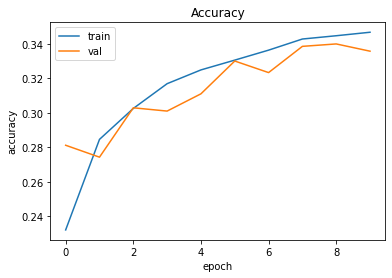

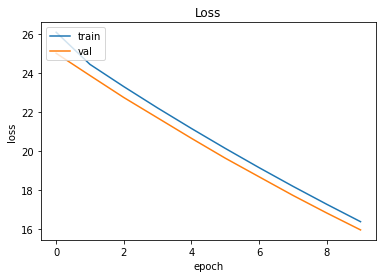

Accuracy:  [0.23215000331401825, 0.28459998965263367, 0.30252501368522644, 0.31687501072883606, 0.3248499929904938, 0.3305250108242035, 0.33629998564720154, 0.34275001287460327, 0.344650000333786, 0.34667500853538513]
Val Accuracy:  [0.28119999170303345, 0.2743000090122223, 0.3028999865055084, 0.3009999990463257, 0.3109999895095825, 0.33000001311302185, 0.32330000400543213, 0.3384999930858612, 0.3398999869823456, 0.33570000529289246]
Loss:  [26.10178565979004, 24.451885223388672, 23.31036949157715, 22.214569091796875, 21.161794662475586, 20.140361785888672, 19.1517333984375, 18.195114135742188, 17.271848678588867, 16.3775691986084]
Val Loss:  [25.019811630249023, 23.880292892456055, 22.751401901245117, 21.704927444458008, 20.656850814819336, 19.63802719116211, 18.68216896057129, 17.728029251098633, 16.824310302734375, 15.954845428466797]


In [ ]:
regularizer = regularizers.l1()

model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    kernel_regularizer=regularizer,
  ),
  layers.Dense(256, activation='relu', kernel_regularizer=regularizer),
  layers.GlobalAveragePooling2D(),
  layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
  layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizer)
])

trainModel(model)

Epoch 1/10
313/313 [==============================] - 4s 12ms/step - loss: 4.7044 - accuracy: 0.2398 - val_loss: 4.2529 - val_accuracy: 0.2032
Epoch 2/10
313/313 [==============================] - 4s 11ms/step - loss: 3.9763 - accuracy: 0.2915 - val_loss: 3.9319 - val_accuracy: 0.3057
Epoch 3/10
313/313 [==============================] - 4s 11ms/step - loss: 3.8949 - accuracy: 0.3199 - val_loss: 3.8722 - val_accuracy: 0.3185
Epoch 4/10
313/313 [==============================] - 4s 11ms/step - loss: 3.8362 - accuracy: 0.3347 - val_loss: 3.8174 - val_accuracy: 0.3386
Epoch 5/10
313/313 [==============================] - 4s 11ms/step - loss: 3.7864 - accuracy: 0.3406 - val_loss: 3.8380 - val_accuracy: 0.3208
Epoch 6/10
313/313 [==============================] - 4s 11ms/step - loss: 3.7430 - accuracy: 0.3546 - val_loss: 3.7567 - val_accuracy: 0.3291
Epoch 7/10
313/313 [==============================] - 4s 12ms/step - loss: 3.7046 - accuracy: 0.3616 - val_loss: 3.6885 - val_accuracy: 0.3646

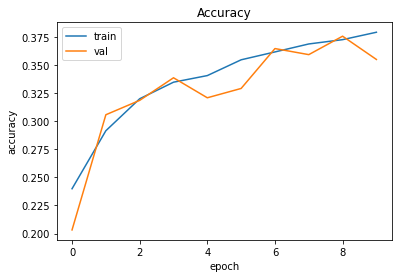

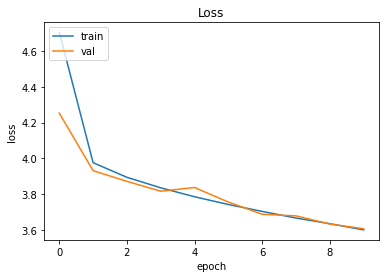

Accuracy:  [0.2398499995470047, 0.29147499799728394, 0.3199250102043152, 0.33467501401901245, 0.3405500054359436, 0.3546000123023987, 0.36160001158714294, 0.3686999976634979, 0.37252500653266907, 0.3791249990463257]
Val Accuracy:  [0.20319999754428864, 0.30570000410079956, 0.31850001215934753, 0.3386000096797943, 0.3208000063896179, 0.32910001277923584, 0.3646000027656555, 0.35920000076293945, 0.37560001015663147, 0.3549000024795532]
Loss:  [4.704427719116211, 3.9763081073760986, 3.8949129581451416, 3.836216449737549, 3.786377429962158, 3.743011713027954, 3.7046291828155518, 3.6676011085510254, 3.636059045791626, 3.601297616958618]
Val Loss:  [4.252912998199463, 3.931858539581299, 3.8722426891326904, 3.817354679107666, 3.8380026817321777, 3.7567172050476074, 3.688490629196167, 3.6797897815704346, 3.6340725421905518, 3.6078133583068848]


In [ ]:
regularizer = regularizers.l2()

model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    kernel_regularizer=regularizer,
  ),
  layers.Dense(256, activation='relu', kernel_regularizer=regularizer),
  layers.GlobalAveragePooling2D(),
  layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
  layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizer)
])

trainModel(model)

Epoch 1/10
313/313 [==============================] - 4s 12ms/step - loss: 27.8284 - accuracy: 0.2474 - val_loss: 26.5491 - val_accuracy: 0.2840
Epoch 2/10
313/313 [==============================] - 4s 12ms/step - loss: 25.7994 - accuracy: 0.2975 - val_loss: 25.1095 - val_accuracy: 0.2941
Epoch 3/10
313/313 [==============================] - 4s 12ms/step - loss: 24.3816 - accuracy: 0.3187 - val_loss: 23.7053 - val_accuracy: 0.3119
Epoch 4/10
313/313 [==============================] - 4s 12ms/step - loss: 23.0293 - accuracy: 0.3279 - val_loss: 22.3805 - val_accuracy: 0.3238
Epoch 5/10
313/313 [==============================] - 4s 12ms/step - loss: 21.7304 - accuracy: 0.3318 - val_loss: 21.1072 - val_accuracy: 0.3213
Epoch 6/10
313/313 [==============================] - 4s 12ms/step - loss: 20.4821 - accuracy: 0.3397 - val_loss: 19.8773 - val_accuracy: 0.3424
Epoch 7/10
313/313 [==============================] - 4s 11ms/step - loss: 19.2818 - accuracy: 0.3398 - val_loss: 18.6982 - val_ac

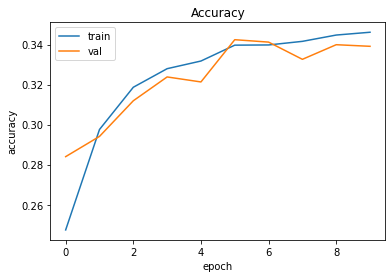

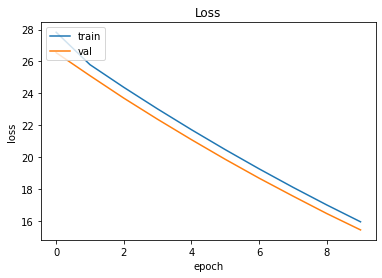

Accuracy:  [0.24740000069141388, 0.2975499927997589, 0.3186500072479248, 0.3279249966144562, 0.3317500054836273, 0.33967500925064087, 0.3397749960422516, 0.3415749967098236, 0.34472501277923584, 0.3461250066757202]
Val Accuracy:  [0.2840000092983246, 0.29409998655319214, 0.31189998984336853, 0.3237999975681305, 0.3212999999523163, 0.3424000144004822, 0.34119999408721924, 0.3325999975204468, 0.3398999869823456, 0.3391000032424927]
Loss:  [27.828378677368164, 25.799428939819336, 24.381614685058594, 23.029260635375977, 21.730430603027344, 20.482080459594727, 19.281841278076172, 18.128726959228516, 17.02351951599121, 15.965779304504395]
Val Loss:  [26.549108505249023, 25.109500885009766, 23.705263137817383, 22.38046646118164, 21.107215881347656, 19.87727928161621, 18.69816017150879, 17.577299118041992, 16.484071731567383, 15.458556175231934]


In [ ]:
regularizer = regularizers.l1_l2()

model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    kernel_regularizer=regularizer,
  ),
  layers.Dense(256, activation='relu', kernel_regularizer=regularizer),
  layers.GlobalAveragePooling2D(),
  layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
  layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizer)
])

trainModel(model)

# 6. (0,5) Avalie o uso de dropout na camada totalmente conectada.

Epoch 1/10
313/313 [==============================] - 5s 16ms/step - loss: 2.5322 - accuracy: 0.2006 - val_loss: 1.9976 - val_accuracy: 0.2646
Epoch 2/10
313/313 [==============================] - 5s 15ms/step - loss: 2.0288 - accuracy: 0.2497 - val_loss: 1.9415 - val_accuracy: 0.2884
Epoch 3/10
313/313 [==============================] - 5s 15ms/step - loss: 1.9839 - accuracy: 0.2649 - val_loss: 1.9406 - val_accuracy: 0.2887
Epoch 4/10
313/313 [==============================] - 5s 15ms/step - loss: 1.9548 - accuracy: 0.2770 - val_loss: 1.8858 - val_accuracy: 0.3076
Epoch 5/10
313/313 [==============================] - 5s 15ms/step - loss: 1.9266 - accuracy: 0.2876 - val_loss: 1.8499 - val_accuracy: 0.3188
Epoch 6/10
313/313 [==============================] - 5s 15ms/step - loss: 1.9029 - accuracy: 0.2944 - val_loss: 1.8672 - val_accuracy: 0.3155
Epoch 7/10
313/313 [==============================] - 5s 15ms/step - loss: 1.8821 - accuracy: 0.2984 - val_loss: 1.8061 - val_accuracy: 0.3374

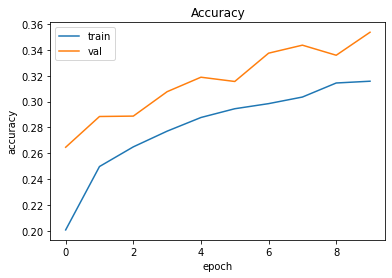

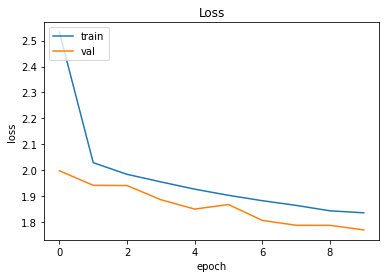

Accuracy:  [0.2006250023841858, 0.24967500567436218, 0.26489999890327454, 0.2770499885082245, 0.2876250147819519, 0.29440000653266907, 0.2983500063419342, 0.30344998836517334, 0.3143250048160553, 0.3156999945640564]
Val Accuracy:  [0.26460000872612, 0.28839999437332153, 0.28870001435279846, 0.3075999915599823, 0.3188000023365021, 0.3154999911785126, 0.33739998936653137, 0.34360000491142273, 0.3357999920845032, 0.35359999537467957]
Loss:  [2.532243251800537, 2.028829574584961, 1.9838744401931763, 1.954786777496338, 1.9266363382339478, 1.9029431343078613, 1.8821287155151367, 1.8640371561050415, 1.843130111694336, 1.8354299068450928]
Val Loss:  [1.9976375102996826, 1.941488265991211, 1.940596342086792, 1.8858376741409302, 1.849861741065979, 1.8672000169754028, 1.806094765663147, 1.787290096282959, 1.7870805263519287, 1.7693896293640137]


In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3
  ),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.3),
  layers.GlobalAveragePooling2D(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model)

Epoch 1/10
313/313 [==============================] - 5s 16ms/step - loss: 2.5393 - accuracy: 0.2176 - val_loss: 2.0447 - val_accuracy: 0.2186
Epoch 2/10
313/313 [==============================] - 5s 15ms/step - loss: 1.9370 - accuracy: 0.2801 - val_loss: 1.8939 - val_accuracy: 0.2989
Epoch 3/10
313/313 [==============================] - 5s 15ms/step - loss: 1.8661 - accuracy: 0.3076 - val_loss: 1.8372 - val_accuracy: 0.3123
Epoch 4/10
313/313 [==============================] - 5s 15ms/step - loss: 1.8168 - accuracy: 0.3226 - val_loss: 1.8510 - val_accuracy: 0.3099
Epoch 5/10
313/313 [==============================] - 5s 15ms/step - loss: 1.7860 - accuracy: 0.3372 - val_loss: 1.8020 - val_accuracy: 0.3310
Epoch 6/10
313/313 [==============================] - 5s 15ms/step - loss: 1.7655 - accuracy: 0.3434 - val_loss: 1.7471 - val_accuracy: 0.3496
Epoch 7/10
313/313 [==============================] - 5s 15ms/step - loss: 1.7440 - accuracy: 0.3512 - val_loss: 1.7751 - val_accuracy: 0.3395

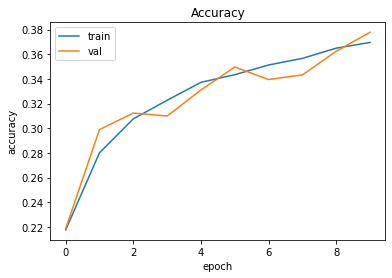

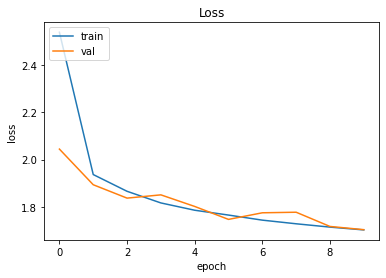

Accuracy:  [0.21757499873638153, 0.2800999879837036, 0.3076249957084656, 0.3226499855518341, 0.33719998598098755, 0.34337499737739563, 0.3512499928474426, 0.3566249907016754, 0.36489999294281006, 0.3695499897003174]
Val Accuracy:  [0.21860000491142273, 0.2989000082015991, 0.3122999966144562, 0.3098999857902527, 0.3310000002384186, 0.3495999872684479, 0.3395000100135803, 0.3431999981403351, 0.36239999532699585, 0.37779998779296875]
Loss:  [2.5393218994140625, 1.9369622468948364, 1.8660588264465332, 1.816835880279541, 1.7859505414962769, 1.765483021736145, 1.743998408317566, 1.728574275970459, 1.7145105600357056, 1.7026211023330688]
Val Loss:  [2.0447428226470947, 1.8938578367233276, 1.8372077941894531, 1.85103440284729, 1.8019979000091553, 1.7471458911895752, 1.7751100063323975, 1.7775022983551025, 1.7172930240631104, 1.7036546468734741]


In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3
  ),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.3),
  layers.GlobalAveragePooling2D(),
  layers.Dense(128, activation='relu'),
  # layers.Dropout(0.3),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model)

Epoch 1/10
313/313 [==============================] - 4s 12ms/step - loss: 2.5885 - accuracy: 0.1965 - val_loss: 2.0295 - val_accuracy: 0.2581
Epoch 2/10
313/313 [==============================] - 4s 11ms/step - loss: 2.0255 - accuracy: 0.2503 - val_loss: 1.9675 - val_accuracy: 0.2743
Epoch 3/10
313/313 [==============================] - 3s 11ms/step - loss: 1.9756 - accuracy: 0.2644 - val_loss: 1.9256 - val_accuracy: 0.2876
Epoch 4/10
313/313 [==============================] - 3s 11ms/step - loss: 1.9448 - accuracy: 0.2785 - val_loss: 1.8741 - val_accuracy: 0.3065
Epoch 5/10
313/313 [==============================] - 3s 11ms/step - loss: 1.9167 - accuracy: 0.2858 - val_loss: 1.8370 - val_accuracy: 0.3268
Epoch 6/10
313/313 [==============================] - 3s 11ms/step - loss: 1.8969 - accuracy: 0.2969 - val_loss: 1.8638 - val_accuracy: 0.3005
Epoch 7/10
313/313 [==============================] - 3s 11ms/step - loss: 1.8760 - accuracy: 0.2978 - val_loss: 1.8053 - val_accuracy: 0.3318

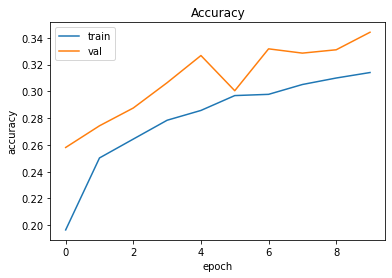

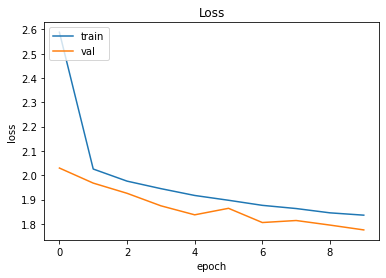

Accuracy:  [0.1965000033378601, 0.25027498602867126, 0.2643750011920929, 0.27845001220703125, 0.28577500581741333, 0.296875, 0.2978000044822693, 0.30515000224113464, 0.3100000023841858, 0.3140999972820282]
Val Accuracy:  [0.2581000030040741, 0.2743000090122223, 0.28760001063346863, 0.30649998784065247, 0.32679998874664307, 0.3005000054836273, 0.33180001378059387, 0.3285999894142151, 0.3310999870300293, 0.3441999852657318]
Loss:  [2.588477849960327, 2.0254721641540527, 1.9756439924240112, 1.9447691440582275, 1.9166831970214844, 1.8969184160232544, 1.8760184049606323, 1.86284339427948, 1.8451496362686157, 1.8355464935302734]
Val Loss:  [2.0295209884643555, 1.967549204826355, 1.9255650043487549, 1.8741185665130615, 1.836970329284668, 1.8637691736221313, 1.8052630424499512, 1.8135664463043213, 1.794774055480957, 1.7748674154281616]


In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3
  ),
  layers.Dense(256, activation='relu'),
  # layers.Dropout(0.3),
  layers.GlobalAveragePooling2D(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model)

# 7. (1,0) Plote os gráficos da função de loss×número de épocas, para o treino e validação de cada modelo. Houve overfitting?

Resposta:
Plotamos os gráficos em cada execução do modelo.

Nenhum deles apresentou discrepância entre a tendência no treino e validação dos valores de loss e acurácia a partir de um número de épocas.

Em determinadas épocas a acurácia caiu muito e a loss aumentou muito, que talvez podemos interpretar com um overfitting naquela iteração.

Talvez se executássemos por épocas o suficiente o overfitting acabaria aparecendo de forma mais constante e ficando mais claro.

Outra possibilidade é os dropouts e os regularizadores terem impedido os modelos de darem overfit de forma constante.

# 8. (0,5) A partir dos experimentos acima, construa o que você considera o melhor modelo e faça a avaliação no conjunto de teste.
Obs: Avaliação no conjunto de teste só pode ser executada uma única vez.

Epoch 1/100
313/313 [==============================] - 14s 46ms/step - loss: 13.9885 - accuracy: 0.2185 - val_loss: 2.1382 - val_accuracy: 0.2355
Epoch 2/100
313/313 [==============================] - 14s 46ms/step - loss: 1.9864 - accuracy: 0.3103 - val_loss: 1.8675 - val_accuracy: 0.3489
Epoch 3/100
313/313 [==============================] - 14s 46ms/step - loss: 1.9780 - accuracy: 0.3076 - val_loss: 2.4289 - val_accuracy: 0.2195
Epoch 4/100
313/313 [==============================] - 14s 46ms/step - loss: 1.9501 - accuracy: 0.3162 - val_loss: 1.8515 - val_accuracy: 0.3538
Epoch 5/100
313/313 [==============================] - 14s 46ms/step - loss: 1.8539 - accuracy: 0.3622 - val_loss: 1.8343 - val_accuracy: 0.3586
Epoch 6/100
313/313 [==============================] - 14s 46ms/step - loss: 1.8276 - accuracy: 0.3740 - val_loss: 2.0533 - val_accuracy: 0.3476
Epoch 7/100
313/313 [==============================] - 14s 46ms/step - loss: 1.8117 - accuracy: 0.3834 - val_loss: 1.7696 - val_a

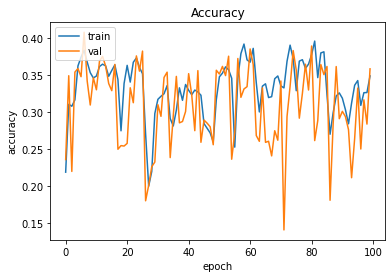

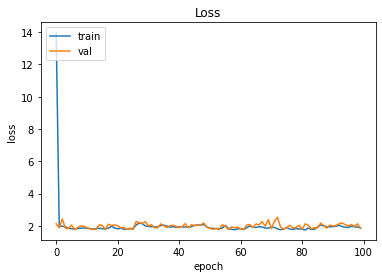

Accuracy:  [0.21847499907016754, 0.31029999256134033, 0.3076249957084656, 0.31622499227523804, 0.362199991941452, 0.37402498722076416, 0.38339999318122864, 0.36739999055862427, 0.35302498936653137, 0.34587499499320984, 0.34850001335144043, 0.3613249957561493, 0.3645249903202057, 0.36217498779296875, 0.34812501072883606, 0.3560749888420105, 0.3636249899864197, 0.34375, 0.2744249999523163, 0.33834999799728394, 0.3629249930381775, 0.3402999937534332, 0.3671000003814697, 0.3729499876499176, 0.36010000109672546, 0.351624995470047, 0.2700999975204468, 0.19955000281333923, 0.2194249927997589, 0.2978000044822693, 0.31700000166893005, 0.3210749924182892, 0.32455000281333923, 0.33557501435279846, 0.2910250127315521, 0.28097501397132874, 0.3023250102996826, 0.3325499892234802, 0.3156749904155731, 0.3370499908924103, 0.32922500371932983, 0.3232249915599823, 0.3295249938964844, 0.3269999921321869, 0.3225249946117401, 0.28417500853538513, 0.27790001034736633, 0.27162501215934753, 0.25952500104904175

In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    padding='valid',
    activation='relu',
    input_shape=(32, 32, 3)
  ),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dense(32*32*3),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model, 100)

In [ ]:
bigModel = model

Epoch 1/100
313/313 [==============================] - 6s 19ms/step - loss: 4.3535 - accuracy: 0.1615 - val_loss: 2.1359 - val_accuracy: 0.2169
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 2.0806 - accuracy: 0.2473 - val_loss: 2.0099 - val_accuracy: 0.2836
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 1.9882 - accuracy: 0.2946 - val_loss: 1.9383 - val_accuracy: 0.3107
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 1.9482 - accuracy: 0.3085 - val_loss: 1.9481 - val_accuracy: 0.3056
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 1.8986 - accuracy: 0.3279 - val_loss: 1.9333 - val_accuracy: 0.3262
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 1.9068 - accuracy: 0.3292 - val_loss: 2.0589 - val_accuracy: 0.2517
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 1.8906 - accuracy: 0.3341 - val_loss: 1.9205 - val_accuracy:

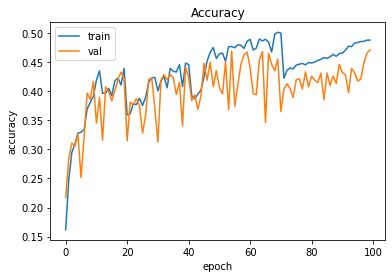

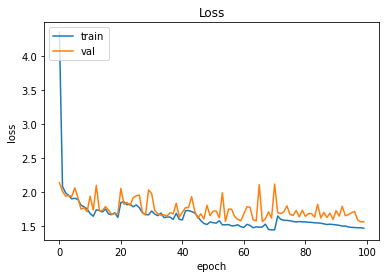

Accuracy:  [0.1615000069141388, 0.24732500314712524, 0.2945750057697296, 0.3085249960422516, 0.32785001397132874, 0.32922500371932983, 0.334075003862381, 0.3692750036716461, 0.38052499294281006, 0.3905999958515167, 0.41874998807907104, 0.4347749948501587, 0.39625000953674316, 0.3964749872684479, 0.4045250117778778, 0.39237499237060547, 0.4176500141620636, 0.4223499894142151, 0.41042500734329224, 0.4389750063419342, 0.3589499890804291, 0.361299991607666, 0.37777501344680786, 0.376924991607666, 0.3876500129699707, 0.3752000033855438, 0.3892750144004822, 0.4150499999523163, 0.42285001277923584, 0.42340001463890076, 0.4004499912261963, 0.4173249900341034, 0.4248749911785126, 0.4056999981403351, 0.4390999972820282, 0.4340499937534332, 0.43277499079704285, 0.44554999470710754, 0.40777501463890076, 0.44804999232292175, 0.44565001130104065, 0.3921250104904175, 0.38692501187324524, 0.3947249948978424, 0.40162500739097595, 0.42410001158714294, 0.45159998536109924, 0.46654999256134033, 0.47477498

In [ ]:
initializer = initializers.GlorotNormal()

model = tf.keras.Sequential([
  layers.Conv2D(
    filters=10,
    kernel_size=3,
    padding='valid', activation='relu', input_shape=(32, 32, 3)
  ),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dense(32*32,
    kernel_initializer=initializer,),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(num_classes, activation='softmax')
])

trainModel(model, 100)

In [ ]:
bestModelWithInitializer = model

Epoch 1/500
313/313 [==============================] - 1s 4ms/step - loss: 1.7420 - accuracy: 0.3582 - val_loss: 1.7652 - val_accuracy: 0.3402
Epoch 2/500
313/313 [==============================] - 1s 4ms/step - loss: 1.7410 - accuracy: 0.3557 - val_loss: 1.7497 - val_accuracy: 0.3549
Epoch 3/500
313/313 [==============================] - 1s 4ms/step - loss: 1.7435 - accuracy: 0.3564 - val_loss: 1.7484 - val_accuracy: 0.3582
Epoch 4/500
313/313 [==============================] - 1s 4ms/step - loss: 1.7433 - accuracy: 0.3538 - val_loss: 1.7628 - val_accuracy: 0.3422
Epoch 5/500
313/313 [==============================] - 1s 4ms/step - loss: 1.7410 - accuracy: 0.3556 - val_loss: 1.7308 - val_accuracy: 0.3618
Epoch 6/500
313/313 [==============================] - 1s 4ms/step - loss: 1.7447 - accuracy: 0.3543 - val_loss: 1.8151 - val_accuracy: 0.3284
Epoch 7/500
313/313 [==============================] - 1s 4ms/step - loss: 1.7420 - accuracy: 0.3550 - val_loss: 1.7333 - val_accuracy: 0.3604

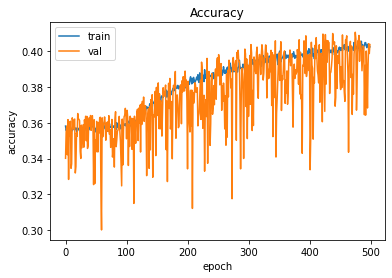

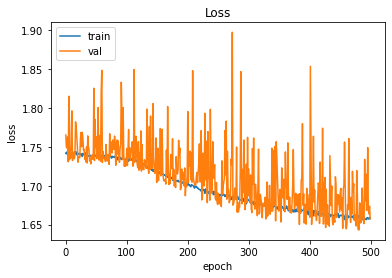

Accuracy:  [0.3582000136375427, 0.3557249903678894, 0.35635000467300415, 0.35382500290870667, 0.3555999994277954, 0.3542749881744385, 0.3549500107765198, 0.35714998841285706, 0.35760000348091125, 0.3567250072956085, 0.35530000925064087, 0.3559750020503998, 0.3560500144958496, 0.35714998841285706, 0.3571000099182129, 0.3564999997615814, 0.3562999963760376, 0.3572250008583069, 0.35567501187324524, 0.3546749949455261, 0.3567500114440918, 0.3561500012874603, 0.35702499747276306, 0.3562999963760376, 0.35567501187324524, 0.3575499951839447, 0.3559750020503998, 0.3573249876499176, 0.3566249907016754, 0.3560749888420105, 0.3561750054359436, 0.35545000433921814, 0.3572250008583069, 0.3572250008583069, 0.35712501406669617, 0.3550249934196472, 0.35945001244544983, 0.357574999332428, 0.3559499979019165, 0.35830000042915344, 0.35714998841285706, 0.35740000009536743, 0.3560749888420105, 0.35837501287460327, 0.3585500121116638, 0.3577499985694885, 0.3578000068664551, 0.35850000381469727, 0.3547750115

In [ ]:
trainModel(simpleRelu500TrainedModel, 500)

Epoch 1/500
313/313 [==============================] - 1s 4ms/step - loss: 1.6590 - accuracy: 0.4048 - val_loss: 1.6598 - val_accuracy: 0.4028
Epoch 2/500
313/313 [==============================] - 1s 4ms/step - loss: 1.6590 - accuracy: 0.4031 - val_loss: 1.6682 - val_accuracy: 0.3939
Epoch 3/500
313/313 [==============================] - 1s 4ms/step - loss: 1.6592 - accuracy: 0.4022 - val_loss: 1.7136 - val_accuracy: 0.3681
Epoch 4/500
313/313 [==============================] - 1s 4ms/step - loss: 1.6577 - accuracy: 0.4015 - val_loss: 1.6452 - val_accuracy: 0.4101
Epoch 5/500
313/313 [==============================] - 1s 4ms/step - loss: 1.6531 - accuracy: 0.4063 - val_loss: 1.6863 - val_accuracy: 0.3942
Epoch 6/500
313/313 [==============================] - 1s 4ms/step - loss: 1.6604 - accuracy: 0.4022 - val_loss: 1.6559 - val_accuracy: 0.4087
Epoch 7/500
313/313 [==============================] - 1s 4ms/step - loss: 1.6554 - accuracy: 0.4047 - val_loss: 1.6478 - val_accuracy: 0.4093

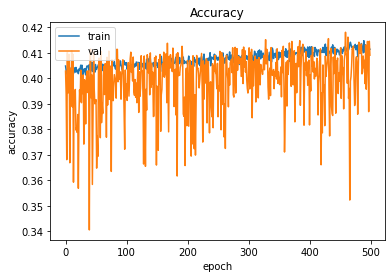

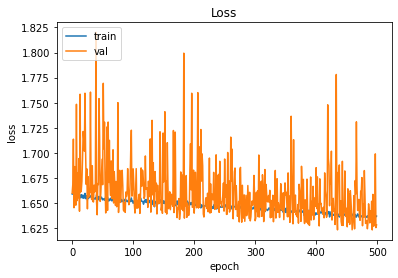

Accuracy:  [0.4047749936580658, 0.40310001373291016, 0.40222498774528503, 0.40149998664855957, 0.40630000829696655, 0.40217500925064087, 0.40472498536109924, 0.4029250144958496, 0.40230000019073486, 0.4039500057697296, 0.40174999833106995, 0.40450000762939453, 0.4015749990940094, 0.4017750024795532, 0.4041000008583069, 0.40255001187324524, 0.4023750126361847, 0.4042249917984009, 0.4025000035762787, 0.40322500467300415, 0.4029749929904938, 0.4017750024795532, 0.4036250114440918, 0.4030250012874603, 0.4039750099182129, 0.4051249921321869, 0.4021250009536743, 0.4050750136375427, 0.40195000171661377, 0.40107500553131104, 0.40357500314712524, 0.4026249945163727, 0.4037249982357025, 0.40130001306533813, 0.40369999408721924, 0.4047499895095825, 0.4047499895095825, 0.4048500061035156, 0.4030500054359436, 0.405349999666214, 0.40380001068115234, 0.4038499891757965, 0.4062249958515167, 0.40347498655319214, 0.40264999866485596, 0.40619999170303345, 0.4032500088214874, 0.4040749967098236, 0.4023500

In [ ]:
trainModel(simpleRelu500TrainedModel, 500)

In [ ]:
bestModelWithInitializer.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 1.5457 - accuracy: 0.4679


[1.545717716217041, 0.46790000796318054]

Epoch 1/100
313/313 [==============================] - 6s 19ms/step - loss: 1.4608 - accuracy: 0.4916 - val_loss: 1.5721 - val_accuracy: 0.4574
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 1.4557 - accuracy: 0.4927 - val_loss: 1.5839 - val_accuracy: 0.4437
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 1.4578 - accuracy: 0.4934 - val_loss: 1.5604 - val_accuracy: 0.4617
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 1.4477 - accuracy: 0.4927 - val_loss: 1.5554 - val_accuracy: 0.4650
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 1.4518 - accuracy: 0.4952 - val_loss: 1.5875 - val_accuracy: 0.4443
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 1.4389 - accuracy: 0.4973 - val_loss: 1.5507 - val_accuracy: 0.4570
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 1.4449 - accuracy: 0.4979 - val_loss: 1.5304 - val_accuracy:

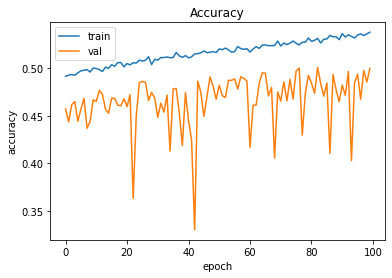

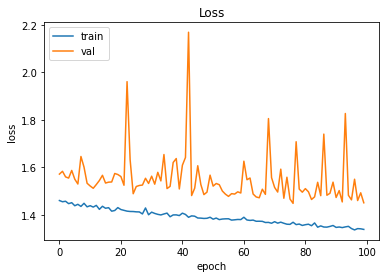

Accuracy:  [0.4916499853134155, 0.4927250146865845, 0.49342501163482666, 0.4927250146865845, 0.4952250123023987, 0.49732500314712524, 0.49790000915527344, 0.4986000061035156, 0.4961250126361847, 0.5003250241279602, 0.4997999966144562, 0.4986250102519989, 0.4966000020503998, 0.5012750029563904, 0.5000249743461609, 0.503724992275238, 0.5021499991416931, 0.5059999823570251, 0.5060250163078308, 0.5015249848365784, 0.5049499869346619, 0.503600001335144, 0.5057500004768372, 0.5055000185966492, 0.508525013923645, 0.5076749920845032, 0.5083749890327454, 0.5122249722480774, 0.5039250254631042, 0.5095000267028809, 0.5086249709129333, 0.5113250017166138, 0.5113000273704529, 0.5118499994277954, 0.5111250281333923, 0.5113250017166138, 0.5166749954223633, 0.5130749940872192, 0.5114750266075134, 0.5133500099182129, 0.5109000205993652, 0.5121250152587891, 0.5151249766349792, 0.515375018119812, 0.5161499977111816, 0.5182250142097473, 0.5163750052452087, 0.5168750286102295, 0.5174499750137329, 0.5165749

In [ ]:
trainModel(bestModelWithInitializer, 100)

Epoch 1/100
313/313 [==============================] - 6s 19ms/step - loss: 1.3298 - accuracy: 0.5385 - val_loss: 1.4593 - val_accuracy: 0.4953
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 1.3367 - accuracy: 0.5378 - val_loss: 1.4459 - val_accuracy: 0.5081
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 1.3299 - accuracy: 0.5393 - val_loss: 1.4797 - val_accuracy: 0.4878
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 1.3222 - accuracy: 0.5415 - val_loss: 1.5115 - val_accuracy: 0.4841
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 1.3190 - accuracy: 0.5446 - val_loss: 1.4429 - val_accuracy: 0.5056
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 1.3121 - accuracy: 0.5472 - val_loss: 1.5635 - val_accuracy: 0.4668
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 1.3146 - accuracy: 0.5456 - val_loss: 1.4219 - val_accuracy:

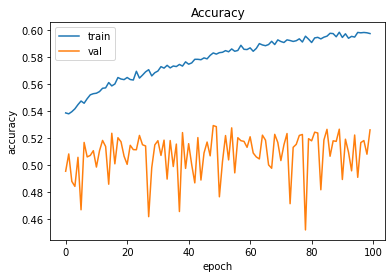

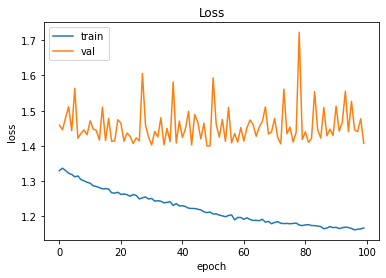

Accuracy:  [0.5384500026702881, 0.5377749800682068, 0.5393499732017517, 0.5414749979972839, 0.5445749759674072, 0.547249972820282, 0.5455999970436096, 0.5489749908447266, 0.5518249869346619, 0.5526750087738037, 0.5530250072479248, 0.5542250275611877, 0.5566750168800354, 0.5569750070571899, 0.5608999729156494, 0.5584250092506409, 0.5598499774932861, 0.5646250247955322, 0.5635250210762024, 0.5630750060081482, 0.5646499991416931, 0.5631499886512756, 0.5627750158309937, 0.5692499876022339, 0.5641999840736389, 0.5664250254631042, 0.5688499808311462, 0.5704249739646912, 0.5658249855041504, 0.5681999921798706, 0.5694249868392944, 0.5726749897003174, 0.5715749859809875, 0.5736500024795532, 0.5717499852180481, 0.5731499791145325, 0.5727499723434448, 0.5742999911308289, 0.5730999708175659, 0.5762249827384949, 0.5744749903678894, 0.5754500031471252, 0.5781000256538391, 0.5781000256538391, 0.5777999758720398, 0.5791500210762024, 0.5784500241279602, 0.5810250043869019, 0.5828250050544739, 0.5819500

In [ ]:
trainModel(bestModelWithInitializer, 100)

In [ ]:
bestModelWithInitializer.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 1.3769 - accuracy: 0.5296


[1.3769035339355469, 0.5296000242233276]

# 9. (4,0) Prepare um relatório de até 4 páginas (máximo) com seus resultados exploratórios e conclusões.

[Link do Relatório](https://docs.google.com/document/d/1ZEcbl2RtGjaEU30RHF86P4HDX0gTCvauDHBjtybRkp4/edit?usp=sharing)